# Proyecto 2 de curso

### IE0247 - Señales y Sistemas I

### 2º Ciclo - 2023

### César Luis Fallas Gutiérrez - Carné: C12770

### Grupo: 01





Se importan las librerías necesarias.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Introducción: Modulación AM

En esta sección se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


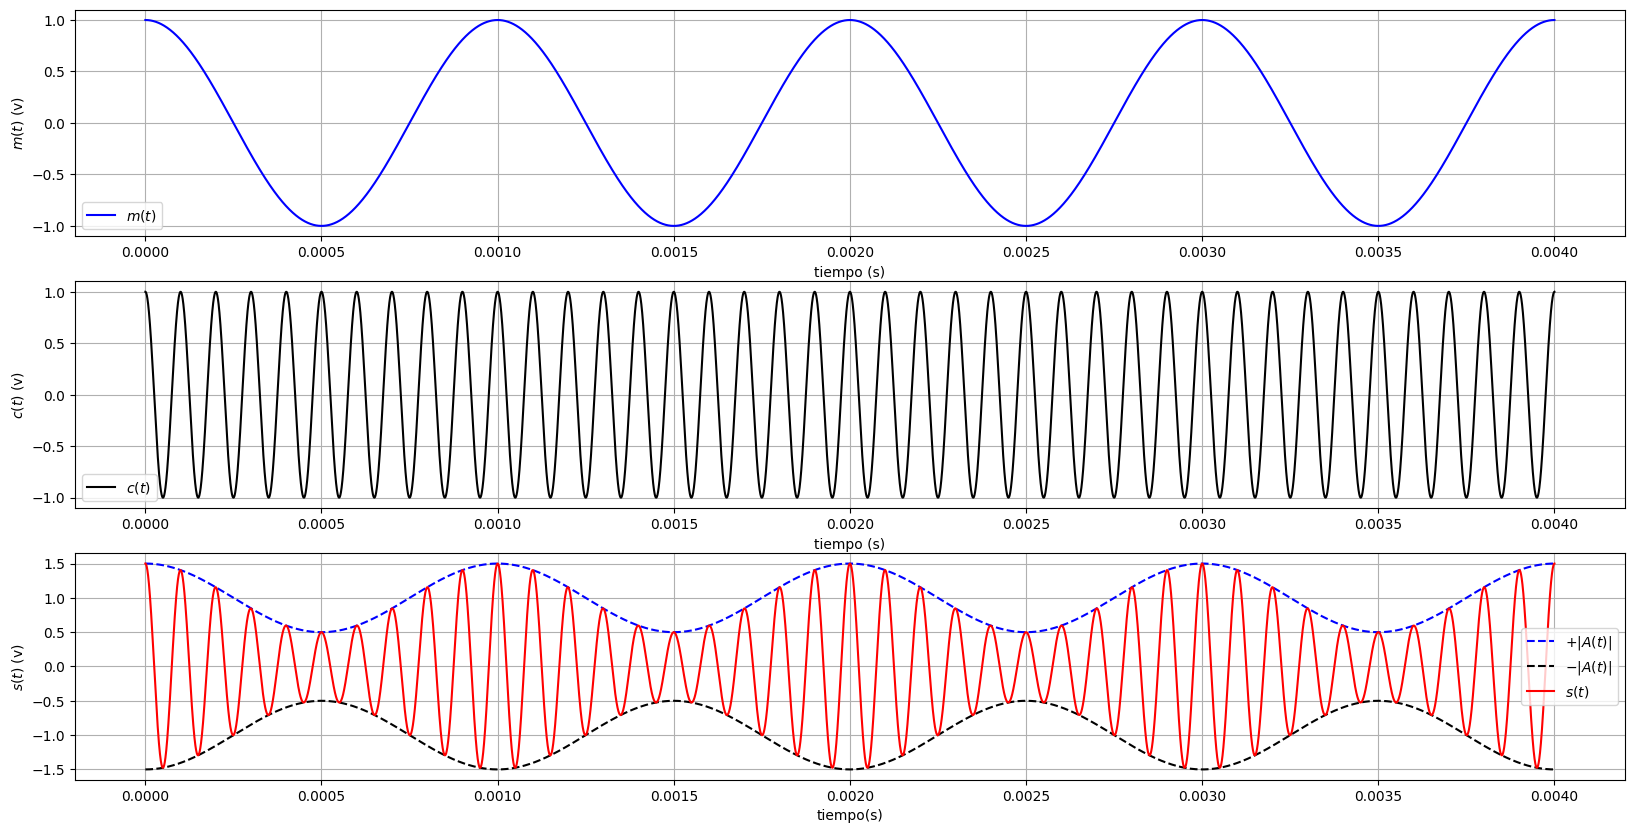

In [59]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


Se presentan algunos parámetros involucrados en la modulación de señales. Se alterarán estos parámetros y se ofrecerá una explicación de lo que estos cambios causan en las gráficas de las señales y sus espectros de magnitud.

# Parámetros involucrados en la modulación AM.


Observar la señal de mensaje $m(t)=A_mcos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

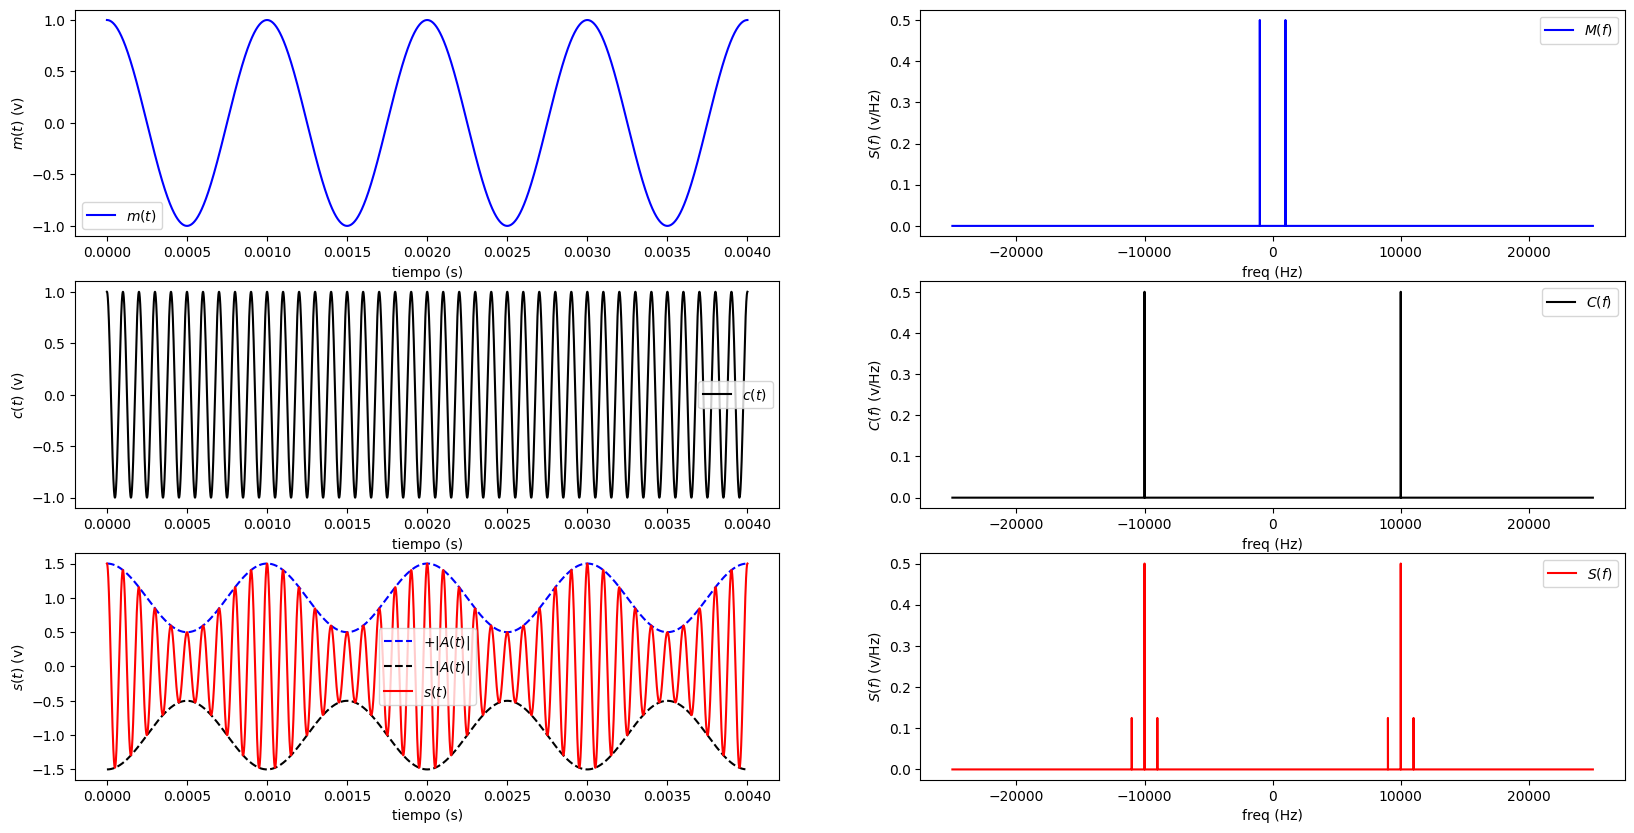

In [60]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


Al tratarse de un producto de la señal mensaje $m(t)$ y la señal portadora $c(t)$, la señal modulada $s(t)$ depende de dichas funciones. Multiplicar las dos señales provoca una señal producto cuyo aspecto es el de una señal portadora ubicada debajo de la onda de la señal mensaje, esto reflejado en el eje $x$. Además esta señal modulada tiene una amplitud distinta a la amplitud de la señal mensaje.

####a) $f_m$; frecuencia de la señal mensaje $m(t)$.

Si se aumenta (disminuye) este parámetro, lo mismo ocurre con la frecuencia de la señal modulada debido a que son directamente proporcionales. Los impulsos del espectro de $m(t)$ se alejan del (acercan al) origen, en consecuencia, los impulsos producidos por $m(t)$ se alejan de (acercan a) los producidos por $c(t)$ en el espectro de la señal modulada.

####b) $f_c$; frecuencia de la señal portadora $c(t)$.

Se incrementa (reduce) la frecuencia de la señal del interior de la señal modulada. Los impulsos del espectro de $c(t)$ se alejan del (acercan al) origen, ocurre lo mismo en el espectro de la señal modulada.

####c) $A_m$; amplitud de la señal mensaje $m(t)$.

Se incrementa (reduce) la amplitud de las señales reflejadas de la señal modulada, si se aumenta mucho, las ondas reflejadas pueden llegar a superponerse entre ellas. Los impulsos del espectro de $m(t)$ aumentan (disminuyen) también su magnitud, ocurre lo mismo con los impulsos producidos por $m(t)$ en el espectro de la señal modulada.

####d) $A_c$; amplitud de la señal portadora $c(t)$.

Se incrementa (reduce) la amplitud de la señal modulada. Todos los impulsos del espectro de $c(t)$ aumentan (disminuyen) también su magnitud.

####5) $K_a$; sensibilidad de la amplitud.

Se incrementa (reduce) la amplitud de las señales reflejadas de la señal modulada sin afectar a las demás señales. A la vez, los impulsos producidos por estas mismas señales aumentan (disminuyen) también su magnitud.

##Análisis

Un aumento desmedido de la amplitud provoca que se superpongan las ondas reflejadas en la señal $s(t)$, esto significa que de ese sistema sale una información poco precisa, lo cual no es deseado en el procesamiento de señales como se ve en las Figuras 1 y 2.

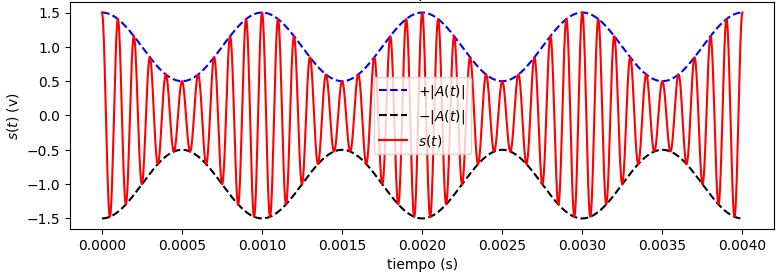

Figura 1. Señal $s(t)$ sin ondas superpuestas, $A_m = 1$

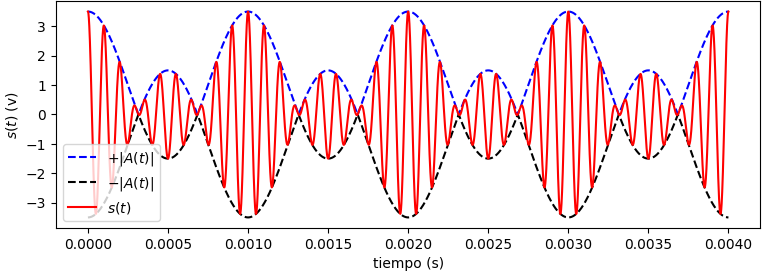

Figura 2. Señal $s(t)$ con ondas superpuestas, $Am = 5$.

# Efecto de cambiar el índice de modulación $\mu$

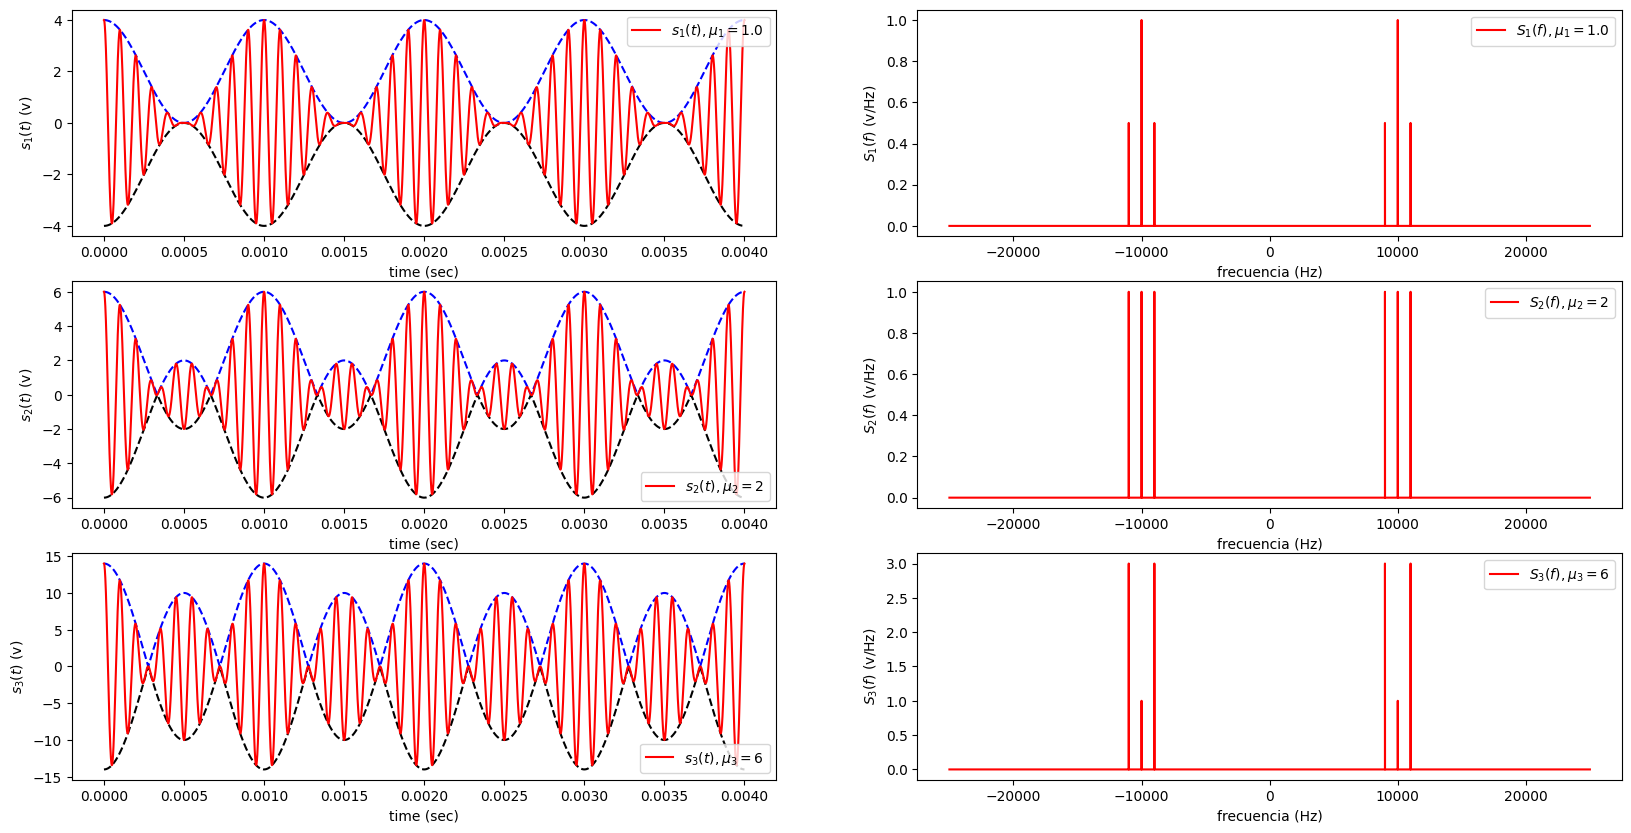

In [61]:
Am1=0.5  # Amplitud de la señal de mensaje 1
Am2=1 # Amplitud de la señal de mensaje 2
Am3=3 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=2 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

####a) $A_{m1}$, $A_{m2}$, $A_{m3}$; amplitudes de las señales mensaje $m_1(t)$, $m_2(t)$ y $m_3(t)$.

En caso de aumento (disminución) de alguno de estos parámetros, en cada señal modulada se aumentará (disminuirá) la amplitud de las señales reflejadas. Si las señales reflejadas no se encuentran superpuestas entre ellas, aumentar mucho este valor puede producir que se superpongan. Esto también aumenta (disminuye) la magnitud de los impulsos de las señales mensaje en el espectro de la señal modulada.

####b) $K_a$; sensibilidad de la amplitud.

Debido a que se usa el índice de modulación $\mu$ el cual afecta a las señales al generarse la señal modulada, aumentar (disminuir) el parámetro $K_a$ provoca que se incrementen (reduzcan) los valores de amplitud de las tres señales a la vez, por lo que se replican los efectos analizados en el punto a).

# Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [62]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [63]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [64]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

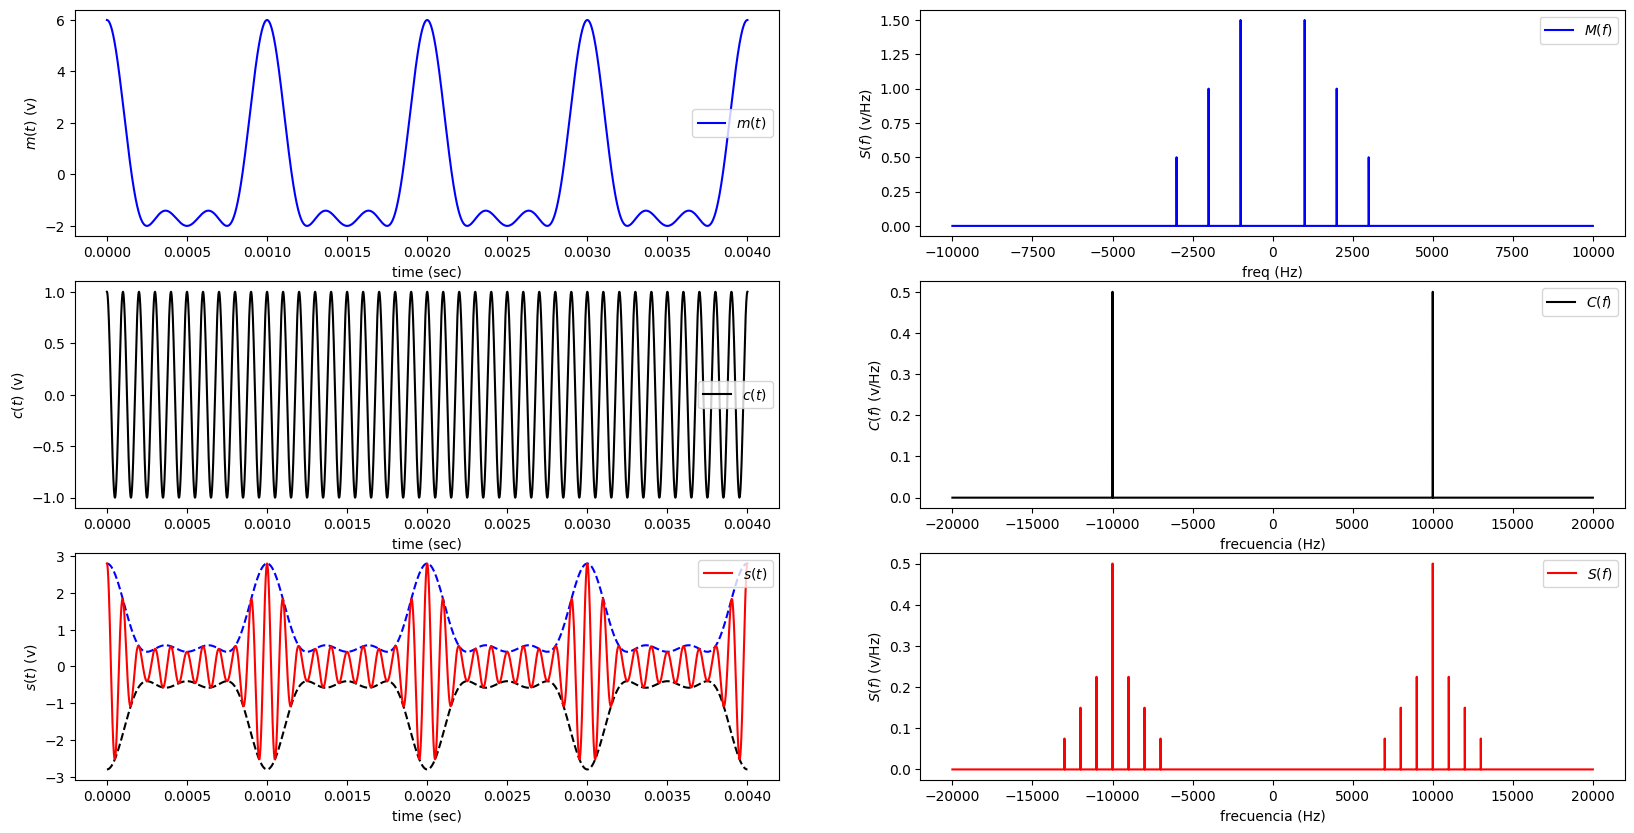

In [65]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

####a) $f_{m1}$, $f_{m2}$, $f_{m3}$; frecuencias de las componentes de la señal mensaje $m(t)$.

Además de afectar a la forma de la señal $m(t)$, aumentar o disminuir la frecuencia de cada componente de manera individual hace que dicha componente de frecuencia se desplace a través del espectro de $s(t)$ sin afectar a las otras componentes (aumentar la frecuencia provoca que se alejen del origen, caso opuesto si se disminuye la frecuencia).

####b) $f_c$; frecuencia de la señal portadora $c(t)$.

En un incremento (reducción) de este parámetro, se aumenta (disminuye) la frecuencia de la señal del interior de la señal modulada. Los impulsos del espectro de $c(t)$ se alejan del (acercan al) origen, ocurre lo mismo en el espectro de la señal modulada. Si se disminuye mucho esta frecuencia, los espectros de las componentes pueden llegar a traslaparse.

####c) $A_{m1}$, $A_{m2}$, $A_{m3}$; amplitudes de las componentes de la señal mensaje $m(t)$.

Si se aumenta (disminuye) alguno de estos parámetros se modifica la forma de $m(t)$, además se incrementa (reduce) la magnitud de los impulsos producidos por cada una de las componentes, esto se repite para el espectro de la señal modulada.

####d) $A_c$; amplitud de la señal portadora $c(t)$.

En un aumento (disminución) se incrementa (reduce) la amplitud de la señal modulada. A su vez, se aumenta (disminuye) la amplitud de todo el espectro de la señal modulada.

##Análisis

Reducir exageradamente la frecuencia de la señal portadora puede producir un traslape en el espectro de magnitud de la señal modulada, nuevamente esto representa una mala interpretación de las señales de entrada esto se puede apreciar en las Figuras 3 y 4.

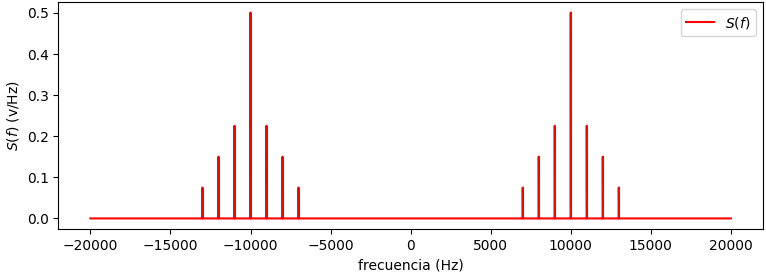

Figura 3. Espectro de $s(t)$ sin traslapes, $f_c = 10000$

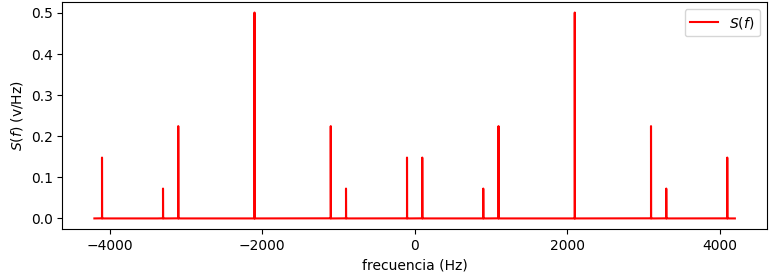

Figura 4. Espectro de $s(t)$ con traslapes, $f_c = 2100$

#Conclusiones

Se ha estudiado la teoría relacionada con la modulación AM de señales continuas, este es un proceso importante en el procesamiento de señales, pues la modulación es lo que permite unir señales para hacerlas viajar en un mismo canal y posteriormente poder separarlas para analizar la información que contengan.

Alterando los valores de amplitud y frecuencia de cada función, se ha visualizado el efecto de estos cambios en las señales, el sistema de software brindado fue fundamental para este estudio.

Existen precauciones que se deben tener cuando se alteran los parámetros de cada señal, por ejemplo; aumentar en exceso la amplitud de determinadas señales puede causar que se superpongan, similarmente ocurre si disminuir mucho la frecuencia provoca que los espectros de la señal modulada acaben traslapándose. En ambos casos la señal de salida brinda una información distinta a la que originalmente se deseaba transmitir.


#Referencias

> [1] M. Coto Jiménez & J. D. Rojas Fernández, "Señales y Sistemas para Ingeniería Eléctrica", pp. 133-145, 2023.

